In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### EDA

In [414]:
data=pd.read_csv('data/heights.csv')
data

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [415]:
data.columns

Index(['name', 'height'], dtype='object')

In [416]:
data.size

40

In [417]:
data.shape

(20, 2)

In [418]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 name      0
height    0
dtype: int64


In [419]:
# Validate data types
print("\nData types:\n", data.dtypes)


Data types:
 name       object
height    float64
dtype: object


In [420]:
data.duplicated().sum()

0

### Detect outlier using boxplot

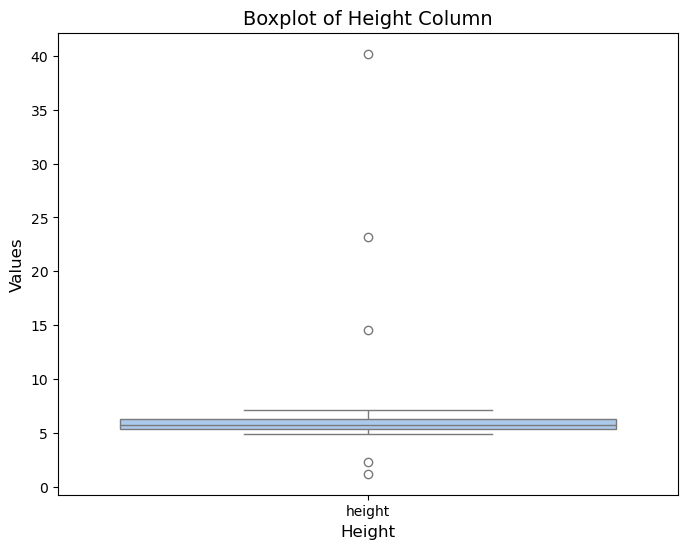

In [422]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['height']], palette='pastel')
plt.title('Boxplot of Height Column', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

### Detecting outliers using the IQR method

In [424]:
Q1 = data['height'].quantile(0.25) #5.3500000000000005
Q3 = data['height'].quantile(0.75) #6.275
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['height'] < lower_bound) | (data['height'] > upper_bound)]
print("\nOutliers:\n", outliers)


Outliers:
      name  height
0   mohan     1.2
1   maria     2.3
17  aamir    14.5
18    ken    23.2
19    Liu    40.2


### Remove Outliers - Method 1

If the outliers are not important for your analysis, you can remove them.

In [427]:
data_with_no_outliers = data[(data['height'] >= lower_bound) & (data['height'] <= upper_bound)]
data_with_no_outliers

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


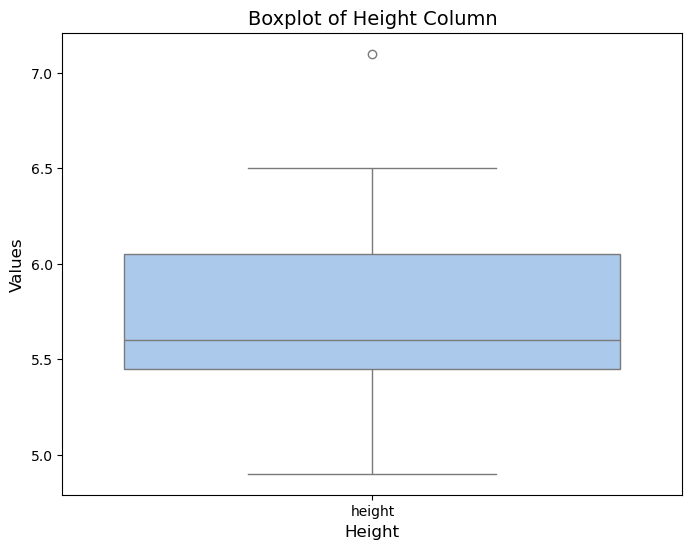

In [428]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_with_no_outliers[['height']], palette='pastel')
plt.title('Boxplot of Height Column', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

### Cap the outliers - Method 2

If you prefer to retain the outliers but bring them within a reasonable range, you can cap them by setting values below the lower bound to the lower bound and values above the upper bound to the upper bound.

In [431]:
data['height']=data['height'].clip(lower=lower_bound,upper=upper_bound)

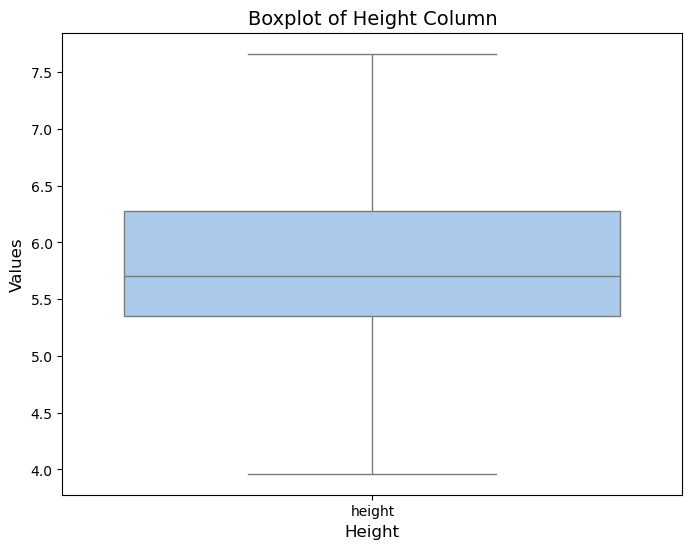

In [432]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['height']], palette='pastel')
plt.title('Boxplot of Height Column', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [433]:
### Capping another method

In [434]:
newdf=pd.read_csv('data/heights.csv')

In [435]:
# Cap the outliers at the upper and lower limits
newdf.loc[newdf['height'] >= upper_limit, 'height'] = upper_limit
newdf.loc[newdf['height'] <= lower_limit, 'height'] = lower_limit

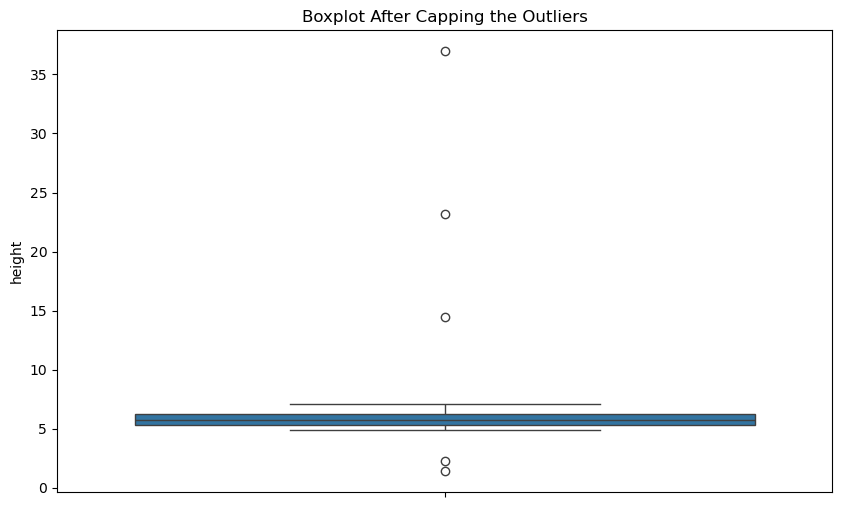

In [436]:
# Boxplot after capping the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=newdf['height'])
plt.title("Boxplot After Capping the Outliers")
plt.show()

### Impute Outliers - Method 3

If the outliers represent missing or incorrect data, you could impute them with a more appropriate value, such as the mean, median, or mode.

In [439]:
# Impute outliers with the median
median_value = data['height'].median()
data['height'] = data['height'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

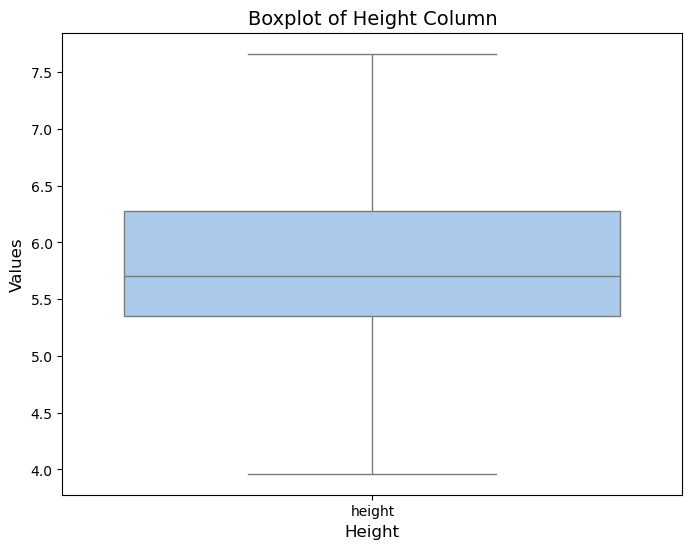

In [440]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['height']], palette='pastel')
plt.title('Boxplot of Height Column', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

### Log Transformation - Method 4

In case of extreme outliers, a log transformation can help compress the range and make the data more normally distributed.

In [443]:
import numpy as np
data['height'] = np.log(data['height'])

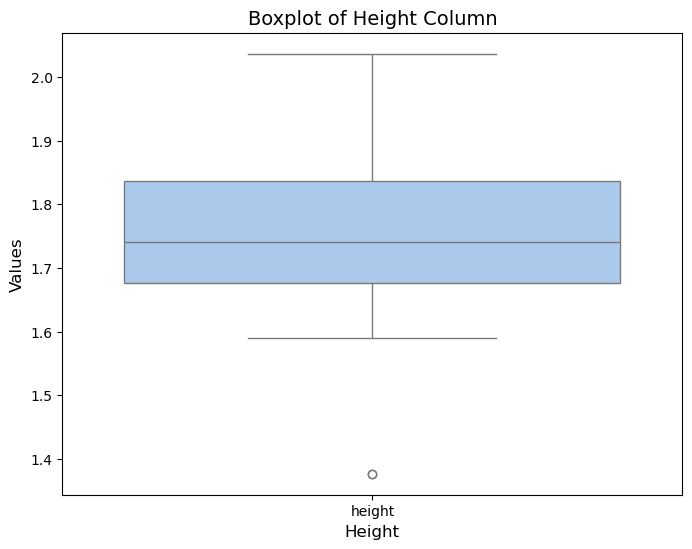

In [444]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['height']], palette='pastel')
plt.title('Boxplot of Height Column', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

### Z-Score Method - Method 5

Alternatively, you can detect outliers using the Z-score (standard deviation method) and handle them accordingly.

In [447]:
from scipy.stats import zscore
data['z_score'] = zscore(data['height'])
outliers_zscore = data[data['z_score'].abs() > 3]  # Outliers are those with a Z-score greater than 3

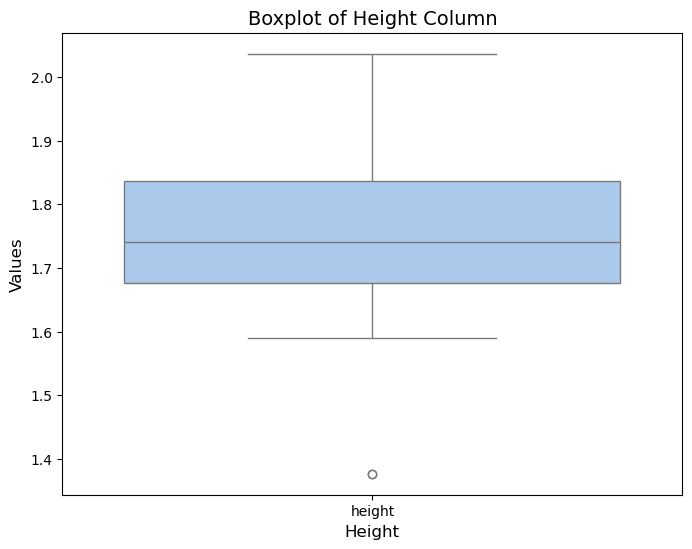

In [448]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['height']], palette='pastel')
plt.title('Boxplot of Height Column', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

In [449]:
### Z Score another method

In [450]:
data=pd.read_csv('data/heights.csv')

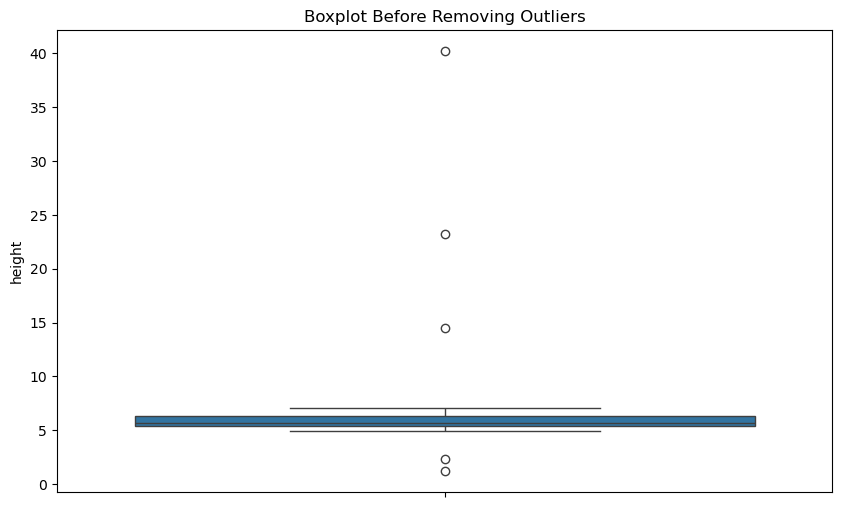

In [451]:
# Boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['height'])
plt.title("Boxplot Before Removing Outliers")
plt.show()

In [452]:
# Calculate the upper and lower limits
upper_limit = data['height'].mean() + 3 * data['height'].std()
lower_limit = data['height'].mean() - 3 * data['height'].std()

# Print the upper and lower limits
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Detect outliers
outliers = data[(data['height'] > upper_limit) | (data['height'] < lower_limit)]
print("Outliers detected:\n", outliers)

# Trimming: Remove outliers
new_df = data[(data['height'] >= lower_limit) & (data['height'] <= upper_limit)]

# Print the before and after lengths
print("Before removing outliers:", len(data))
print("After removing outliers:", len(new_df))


Upper limit: 34.7384364861211
Lower limit: -17.958436486121105
Outliers detected:
    name  height
19  Liu    40.2
Before removing outliers: 20
After removing outliers: 19


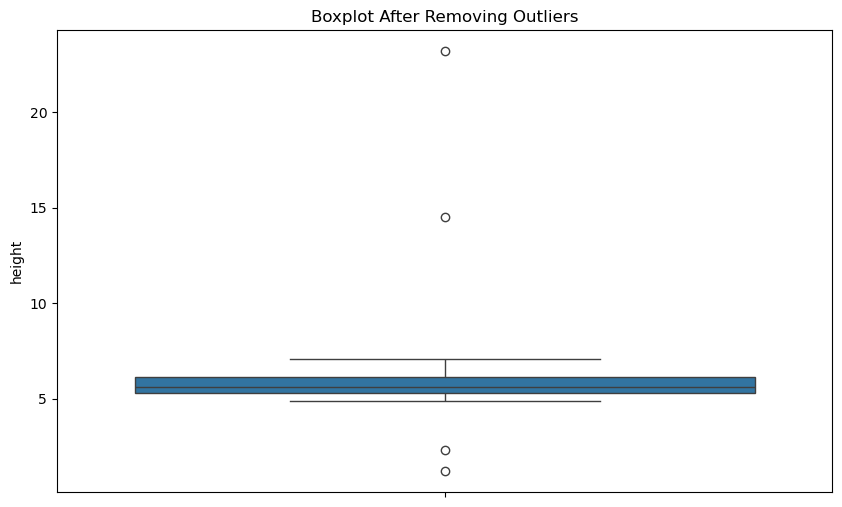

In [453]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df['height'])
plt.title("Boxplot After Removing Outliers")
plt.show()

### Percentile - Method 6

The percentile method is a technique used to detect and handle outliers by looking at the values at specific percentiles of the data distribution. Percentiles represent the position or rank of values within a dataset relative to the whole distribution. In the context of outlier detection, percentiles are often used to set thresholds for what can be considered as normal data versus outliers.

In [456]:
# Calculate the 1st and 99th percentiles
lower_limit = data['height'].quantile(0.01)  # 1st percentile
upper_limit = data['height'].quantile(0.99)  # 99th percentile

# Display the limits
print("Lower Limit (1st percentile):", lower_limit)
print("Upper Limit (99th percentile):", upper_limit)

# Identify outliers
outliers = data[(data['height'] < lower_limit) | (data['height'] > upper_limit)]
print("Outliers detected:\n", outliers)

# Optionally, remove outliers by trimming the data
data_cleaned = data[(data['height'] >= lower_limit) & (data['height'] <= upper_limit)]
print("Data after removing outliers:", len(data_cleaned))


Lower Limit (1st percentile): 1.4089999999999998
Upper Limit (99th percentile): 36.96999999999998
Outliers detected:
      name  height
0   mohan     1.2
19    Liu    40.2
Data after removing outliers: 18


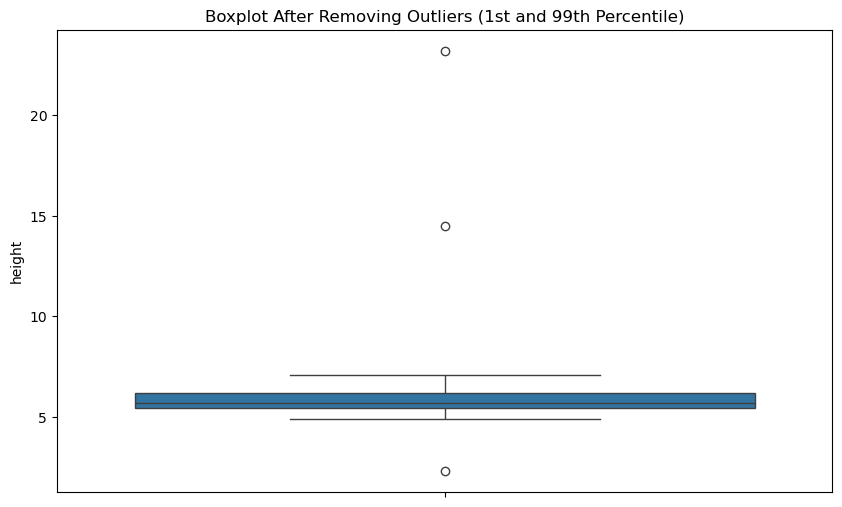

In [457]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned['height'])
plt.title("Boxplot After Removing Outliers (1st and 99th Percentile)")
plt.show()

In [458]:
#END